In [6]:
! ls ../../data_files/csv_files/marketing_customer_analysis.csv

../../data_files/csv_files/marketing_customer_analysis.csv


In [7]:
import pandas as pd
import numpy as np
import calendar
import seaborn as sns

In [14]:
data = pd.read_csv("../../data_files/csv_files/marketing_customer_analysis.csv").drop(["Unnamed: 0"], axis=1)

In [15]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [101]:
#1. Show the dataframe shape.
data.shape

(10910, 25)

In [102]:
#2. Standardize header names.
data.columns = [i.lower().replace(" ", "_") for i in data.columns]
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [103]:
# 3. Which columns are numerical?
data.select_dtypes(include=["int","float"]).columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [104]:
# 4. Which columns are categorical?
data.select_dtypes(exclude=["int","float"]).columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [115]:
# 5. Check and deal with `NaN` values.
print(data.columns[data.isna().any()].tolist())
data = data.drop_duplicates()

[]


<AxesSubplot:>

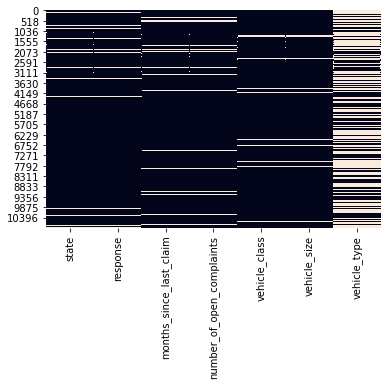

In [106]:
# columns where at least exsit one nan value

data_with_nulls = data[data.columns[data.isna().any()].tolist()]
sns.heatmap(data_with_nulls.isna(), cbar=False)

##### Value percentages

In [107]:
def get_value_percentage(column):
    percentage = round(data[column].isna().sum() / len(data) * 100,2)
    print(f'The nan values of {column} is: {percentage}%')

for column in data_with_nulls.columns:
    get_value_percentage(column)

The nan values of state is: 5.65%
The nan values of response is: 5.65%
The nan values of months_since_last_claim is: 5.73%
The nan values of number_of_open_complaints is: 5.73%
The nan values of vehicle_class is: 5.59%
The nan values of vehicle_size is: 5.59%
The nan values of vehicle_type is: 50.26%


In [108]:
data = data.drop(["vehicle_type"], axis=1)

In [110]:
for column in data_with_nulls.columns[:-1]:
    get_value_percentage(column)

The nan values of state is: 5.65%
The nan values of response is: 5.65%
The nan values of months_since_last_claim is: 5.73%
The nan values of number_of_open_complaints is: 5.73%
The nan values of vehicle_class is: 5.59%
The nan values of vehicle_size is: 5.59%


In [114]:
data = data.dropna(axis=0, subset=["state","months_since_last_claim","vehicle_class"])

for column in data_with_nulls.columns[:-1]:
    get_value_percentage(column)

The nan values of state is: 0.0%
The nan values of response is: 0.0%
The nan values of months_since_last_claim is: 0.0%
The nan values of number_of_open_complaints is: 0.0%
The nan values of vehicle_class is: 0.0%
The nan values of vehicle_size is: 0.0%


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   

In [42]:
# 6. Datetime format - Extract the months from the dataset and store in a separate column. 
#Then filter the data to show only 
#the information for the first quarter , ie. January, February and March. 
#_Hint_: If data from March does not exist, consider only January and February.

data["month"] = pd.to_datetime(data.effective_to_date).map(lambda x : calendar.month_name[x.month])

In [56]:
#data_first_quarter = 
data_first_quarter = data[data.month.isin(["February", "January"])]

In [57]:
data_first_quarter.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January
